<a href="https://colab.research.google.com/github/Ifetayo-Adebola/Machine-Learning/blob/main/UB21044789BankLoanRiskModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pickle
!pip install sklearn
!pip install scikit-learn-intelex


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=44033c7be6247c4a296ed862d2877c453ae9e214159e005967d21adcbf6593a5
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 8.4 MB/s eta

In [ ]:
! pip install mlflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 12.2 MB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 210 kB 79.5 MB/s 
     |████████████████████████████████| 184 kB 67.1 MB/s 
     |████████████████████████████████| 147 kB 31.8 MB/s 
     |████████████████████████████████| 82 kB 196 kB/s 
     |████████████████████████████████| 575 kB 60.5 MB/s 
     |████████████████████████████████| 78 kB 8.3 MB/s 
     |████████████████████████████████| 140 kB 70.7 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.17.4-py3-none-any.whl size=142894 sha256=3878498b9e51488f6d74df8a524ed95b360b20ce28fb86ee92b67b287ac94d04
  Stored in directory: /root/.cache/pip/wheels/4

In [ ]:
import pandas as pd
import pickle
import numpy as np
import plotly.express as px
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
import matplotlib
import mlflow
import mlflow.sklearn
import sklearn
from matplotlib import pyplot as plt


In [ ]:
print("Numpy: {}".format(np.__version__))
print("Pandas: {}".format(pd.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("seaborn: {}",format(sns.__version__))
print("Scikit-Learn-Intelex: {}".format(sklearn.__version__))
print("MLFlow: {}".format(mlflow.__version__))

Numpy: 1.21.6
Pandas: 1.3.5
matplotlib: 3.2.2
seaborn: {} 0.11.2
Scikit-Learn-Intelex: 1.0.2
MLFlow: 2.1.1


In [ ]:
!pip install scipy
import scipy.stats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Default_Fin.csv', index_col=0)
df.head(7)

Saving Default_Fin.csv to Default_Fin.csv


,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0
6,0,11035.08,89898.72,0
7,1,9906.12,298862.76,0


In [ ]:
data = pd.read_csv('Default_Fin.csv', index_col=0)
data.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
Index,,,,
1,1,8754.36,532339.56,0
2,0,9806.16,145273.56,0
3,1,12882.60,381205.68,0
4,1,6351.00,428453.88,0
5,1,9427.92,461562.00,0


In [ ]:
data.shape

(10000, 4)

In [ ]:
RAND_SEED = 123

**EXPLORATORY DATA ANALYSIS**

Check NaN Values

In [ ]:
data.isna().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

Data Overview

In [ ]:
data.describe()


,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


Feature Engineering

In [ ]:
data.insert(3, 'Saving Rate', data['Bank Balance'] / data['Annual Salary'])
data.head()

,Employed,Bank Balance,Annual Salary,Saving Rate,Defaulted?
Index,,,,,
1,1,8754.36,532339.56,0.016445,0
2,0,9806.16,145273.56,0.067501,0
3,1,12882.60,381205.68,0.033794,0
4,1,6351.00,428453.88,0.014823,0
5,1,9427.92,461562.00,0.020426,0


**Data** Distribution

Distribution of Employed

In [ ]:
table = data['Employed'].value_counts().reset_index()
table.columns =['Status', 'Number']
table['Status'] = table['Status'].map({1 :'Employed', 0 : 'Unemployed'})
table

,Status,Number
0,Employed,7056
1,Unemployed,2944


In [ ]:
fig = px.pie(table,
             values = 'Number',
             names = 'Status',
             title = 'Employed Status')
fig.show()

Distribution of Defaulted

In [ ]:
table = data['Defaulted?'].value_counts().reset_index()
table.columns = ['Status', 'Number']
table['Status'] = table['Status'].map({1: 'Defaulted', 0: 'Not defaulted'})
table

,Status,Number
0,Not defaulted,9667
1,Defaulted,333


In [ ]:
fig = px.pie(table,
             values = 'Number',
             names = 'Status',
             title = 'Default Status')
fig.show()

In [ ]:
table = data.copy()
table['Employed'] = table['Employed'].map({1 :'Employed', 0:'Unemployed'})
table['Defaulted?'] = table['Defaulted?'].map({1 :'Defaulted', 0:'Not defaulted'})


In [ ]:
fig = px.sunburst(table,
                  path = ['Employed', 'Defaulted?'],
                  title = 'Default in relation with employment status')
fig.show()

Contigency Table

In [ ]:
table = pd.crosstab(data['Employed'],
                    data['Defaulted?'])
table

Defaulted?,0,1
Employed,,
0,2817,127
1,6850,206


Pearson's chi-squared test for independence

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(table)
p

0.0004997256756210478

Bank Balance Distribution

In [ ]:
fig = px.histogram(data, x="Bank Balance", color='Defaulted?', 
                   marginal="box", # or violin, rug
                   hover_data=data.columns)
fig.show()




In [ ]:
(data['Bank Balance']<=10).sum()

501

Distribution of Annual Salary

In [ ]:
fig = px.histogram(data, x="Annual Salary",
                   color="Defaulted?",
                   marginal="box", # or violin, rug
                   hover_data=data.columns)
fig.show()

Saving Rate Distribution

In [ ]:
fig = px.histogram(data, x="Saving Rate",
                   color="Defaulted?",
                   marginal="box", # or violin, rug
                   hover_data=data.columns)
fig.show()

MODEL BUILDING

Train Test Split


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1],test_size=0.3, stratify=data.iloc[:,-1],random_state=RAND_SEED)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7000, 4) (3000, 4) (7000,) (3000,)


STANDARDIZATION

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler().fit(X_train)


In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

SAMPLING WITH SMOTE

In [ ]:
X_train.shape, y_train.shape

((7000, 4), (7000,))

In [ ]:
y_train.value_counts()


0    6767
1     233
Name: Defaulted?, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=RAND_SEED)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [ ]:
X_train.shape, y_train.shape

((13534, 4), (13534,))

In [ ]:
y_train.value_counts()

0    6767
1    6767
Name: Defaulted?, dtype: int64

In [ ]:
def train(sk_model, X_train, y_train):
  sk_model = sk_model.fit(X_train, y_train)
  train_acc = sk_model.score(X_train, y_train)
  mlflow.log_metric("train_acc", train_acc)
  print(f"Train Accuracy: {train_acc:.3%}")


# Classification using Random Forest, Logistic Regression, SVM and XGBoost

Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = clf.predict(X_test)

Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf, X_train, y_train, scoring='recall' ,cv=5, )

array([0.9563932 , 0.96008869, 0.95420975, 0.9534712 , 0.95934959])

Prediction

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[2665  235]
 [  35   65]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2900
           1       0.22      0.65      0.33       100

    accuracy                           0.91      3000
   macro avg       0.60      0.78      0.64      3000
weighted avg       0.96      0.91      0.93      3000



Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
distributions = dict(n_estimators=np.arange(10, 500, 10),
                     criterion=['gini', 'entropy'],
                     max_depth = range(20),
                     min_samples_split = range(2, 20),
                     min_samples_leaf = range(3, 50),
                     bootstrap = [True, False],
                     class_weight = ['balanced', 'balanced_subsample']
                    )

In [ ]:
clf = RandomizedSearchCV(RandomForestClassifier(), 
                         distributions,
                         scoring='recall', 
                         n_iter=20,
                         n_jobs = 4,
                         random_state=RAND_SEED)
clf_random_forest = clf.fit(X_train, y_train)
clf_random_forest.best_params_

{'n_estimators': 490,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_depth': 8,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'bootstrap': False}

In [ ]:
y_pred_random_forest = clf_random_forest.predict(X_test)

Tuned Prediction Result

In [ ]:
print(confusion_matrix(y_test,y_pred_random_forest))

[[2548  352]
 [  18   82]]


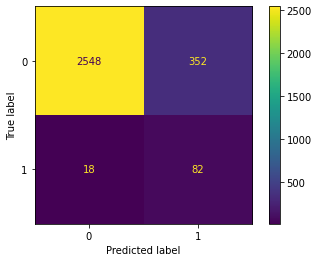

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_random_forest)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2900
           1       0.19      0.82      0.31       100

    accuracy                           0.88      3000
   macro avg       0.59      0.85      0.62      3000
weighted avg       0.97      0.88      0.91      3000



Using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
clf=LogisticRegression(solver='saga',random_state=RAND_SEED).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

Cross Validation

In [ ]:
cross_val_score(clf, X_train, y_train, scoring ='recall' ,cv=5, )

array([0.91574279, 0.90613452, 0.9084195 , 0.90915805, 0.90909091])

In [ ]:
print(confusion_matrix(y_test,y_pred))


[[2548  352]
 [  15   85]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2900
           1       0.19      0.85      0.32       100

    accuracy                           0.88      3000
   macro avg       0.59      0.86      0.62      3000
weighted avg       0.97      0.88      0.91      3000



Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
distributions = dict(C=np.linspace(2, 1000, 100),
                     penalty=['l2', 'l1'])

In [ ]:
clf = RandomizedSearchCV(LogisticRegression(solver='saga',random_state=RAND_SEED), 
                         distributions,
                         scoring='recall', 
                         n_iter=100,
                         n_jobs = -1,
                         random_state=RAND_SEED)
clf_logistic = clf.fit(X_train, y_train)
clf_logistic.best_params_

{'penalty': 'l2', 'C': 254.02020202020202}

In [ ]:
y_pred_logistic = clf_logistic.predict(X_test)

Tuned prediction result

In [ ]:
print(confusion_matrix(y_test,y_pred_logistic))

[[2547  353]
 [  15   85]]


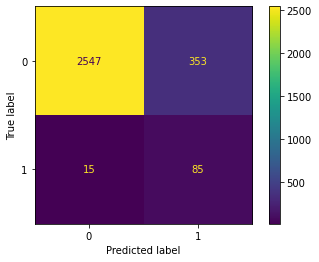

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_logistic)
plt.show() 

In [ ]:
print(classification_report(y_test,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2900
           1       0.19      0.85      0.32       100

    accuracy                           0.88      3000
   macro avg       0.59      0.86      0.62      3000
weighted avg       0.97      0.88      0.91      3000



Using Support Vector Machine


In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(probability = True)
clf.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred = clf.predict(X_test)


Cross Validation

In [ ]:
cross_val_score(clf, X_train, y_train, scoring='recall' ,cv=5, )

array([0.94604582, 0.94826312, 0.94017725, 0.94239291, 0.94604582])

Prediction Result

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[2427  473]
 [  11   89]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      2900
           1       0.16      0.89      0.27       100

    accuracy                           0.84      3000
   macro avg       0.58      0.86      0.59      3000
weighted avg       0.97      0.84      0.89      3000



Hyperparameters Tuning

In [ ]:
distributions = dict(C=np.logspace(0, 4, 50),
                     degree = np.linspace(1,10,1),
                     class_weight = [None, 'balanced'],
                    )

In [ ]:
clf = RandomizedSearchCV(SVC(probability=True, cache_size = 1024*25), 
                         distributions,
                         scoring='recall', 
                         n_iter=1, 
                         n_jobs = 1,
                         random_state=RAND_SEED) 
clf_SVC = clf.fit(X_train, y_train)
clf_SVC.best_params_

{'degree': 1.0, 'class_weight': None, 'C': 494.1713361323833}

In [ ]:
y_pred_SVC = clf_SVC.predict(X_test)

Prediction Result

In [ ]:
print(confusion_matrix(y_test,y_pred_SVC))

[[2437  463]
 [  13   87]]


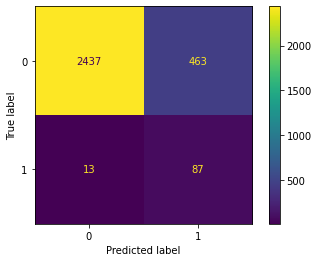

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_SVC)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_SVC))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2900
           1       0.16      0.87      0.27       100

    accuracy                           0.84      3000
   macro avg       0.58      0.86      0.59      3000
weighted avg       0.97      0.84      0.89      3000



Using XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = clf.predict(X_test)

Cross Validation

In [ ]:
cross_val_score(clf, X_train, y_train, scoring='recall' ,cv=5, )

array([0.94826312, 0.95417591, 0.94903988, 0.93870015, 0.95048041])

Prediction Result

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[2512  388]
 [  16   84]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2900
           1       0.18      0.84      0.29       100

    accuracy                           0.87      3000
   macro avg       0.59      0.85      0.61      3000
weighted avg       0.97      0.87      0.90      3000



Hyperparameter tuning

In [ ]:
distributions = { 
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth':np.arange(2,10,1),
    'learning_rate':np.logspace(-4, 1, 50), 
    'subsample':np.linspace(0.1, 1, 10),
    'colsample_bytree':np.linspace(0.1, 1, 10), 
}

In [ ]:
clf = RandomizedSearchCV(XGBClassifier(), 
                         distributions,
                         scoring='recall', 
                         n_iter=10,
                         n_jobs = 4,
                         random_state=RAND_SEED)
clf_xgb = clf.fit(X_train, y_train)
clf_xgb.best_params_

{'subsample': 0.9,
 'n_estimators': 600,
 'max_depth': 8,
 'learning_rate': 0.008685113737513529,
 'colsample_bytree': 0.6}

In [ ]:
y_pred_xgb = clf_xgb.predict(X_test)

Tuned Prediction result

In [ ]:
print(confusion_matrix(y_test,y_pred_xgb))

[[2582  318]
 [  23   77]]


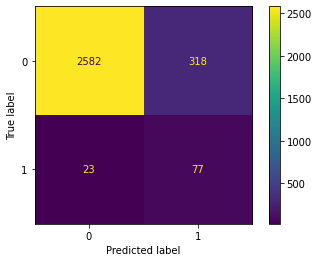

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb)
plt.show()

 #Model Evaluation/Assessment
 


ROC curve

In [ ]:
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import seaborn as sns
sns.set()

In [ ]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
from sklearn.metrics import roc_auc_score
#import mlflow
mlflow.autolog()
import mlflow.sklearn
def evaluate(sk_model, X_test, y_test):
  eval_acc = sk_model.score(X_test, y_test)
  preds = sk_model.predict(X_test)
  auc_score = roc_auc_score(y_test, preds)
  mlflow.log_metric("eval_acc", eval_acc)
  mlflow.log_metric("auc_score", auc_score)
  print(f"Auc Score: {auc_score:.3%}")
  print(f"Eval Accuracy: {eval_acc:.3%}")
  roc_plot = plot_roc_curve(sk_model, X_test, y_test, name='Scikit-learn ROC Curve')
  plt.savefig("sklearn_roc_plot.png")
  plt.show()
  plt.clf()
  conf_matrix = confusion_matrix(y_test, preds)
  ax = sns.heatmap(conf_matrix, annot=True,fmt='g')
  ax.invert_xaxis()
  ax.invert_yaxis()
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title("Confusion Matrix")
  plt.savefig("sklearn_conf_matrix.png")
  mlflow.log_artifact("sklearn_roc_plot.png")
  mlflow.log_artifact("sklearn_conf_matrix.png")

NameError: ignored

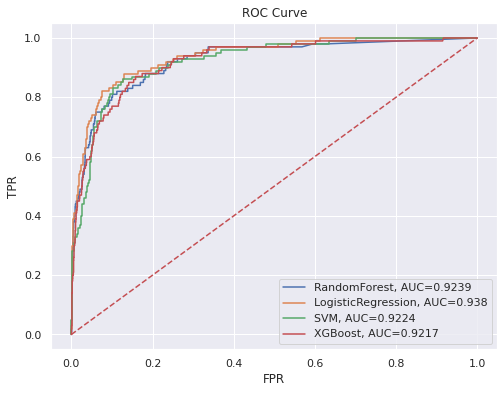

In [ ]:
model_names = ['RandomForest','LogisticRegression','SVM','XGBoost']
models = [clf_random_forest,clf_logistic, clf_SVC, clf_xgb]

plt.figure(figsize=(8, 6))

for name, model in zip(model_names, models):
    prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, prob)
    model_auc = round(auc(fpr, tpr), 4)
    plt.plot(fpr,tpr,label="{}, AUC={}".format(name, model_auc))

random_classifier=np.linspace(0.0, 1.0, 100)
plt.plot(random_classifier, random_classifier, 'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

Precision Recall curve


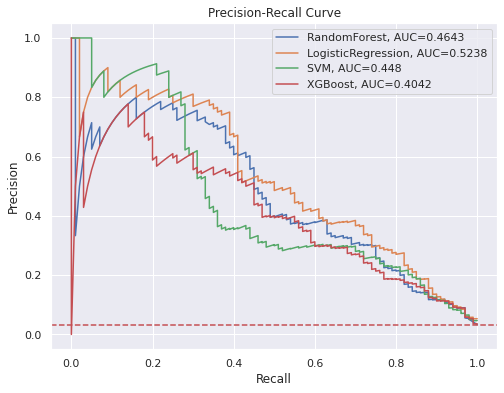

In [ ]:
plt.figure(figsize=(8, 6))

for name, model in zip(model_names, models):
    prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, prob)
    model_auc = round(auc(recall, precision), 4)
    plt.plot(recall, precision,label="{}, AUC={}".format(name, model_auc))

neg=y_test.value_counts().iloc[0]
pos=y_test.value_counts().iloc[1]

plt.axhline(y=pos/(pos+neg), color='r', linestyle='--')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [ ]:
sk_model = LogisticRegression(random_state=RAND_SEED, max_iter=400, solver='saga')

In [ ]:
mlflow.set_experiment("scikit_learn_experiment")

<Experiment: artifact_location='file:///content/mlruns/887543159408484439', creation_time=1672670803347, experiment_id='887543159408484439', last_update_time=1672670803347, lifecycle_stage='active', name='scikit_learn_experiment', tags={}>

Train Accuracy: 89.168%
Auc Score: 86.431%
Eval Accuracy: 87.767%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.



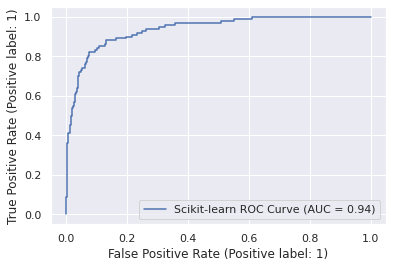

Model run:  e657ed5b14854f55a427b30af4e01d63


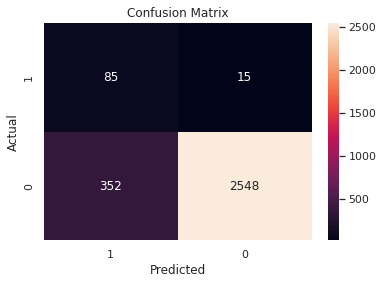

In [ ]:
with mlflow.start_run():
  train(sk_model, X_train, y_train)
  evaluate(sk_model, X_test, y_test)
  preds = sk_model.predict(X_test)
  auc_score = roc_auc_score(y_test, preds)
  mlflow.sklearn.log_model(sk_model, "log_reg_model")
  print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

Loading a logged Logistic Regression Model

In [ ]:
loaded_model = mlflow.sklearn.load_model("runs:/e657ed5b14854f55a427b30af4e01d63/log_reg_model")

In [ ]:
loaded_model.score(X_test, y_test)

0.8776666666666667

In [ ]:
pickle.dump(model, open('model.pkl'))